# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [82]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [109]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [84]:
cursor = con.cursor()
sql = """
SELECT MAX(hire_date), MIN(hire_date)
FROM employees"""
cursor.execute(sql)
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [102]:
import pandas as pd
sql = """
SELECT *
FROM salaries s1
WHERE to_date = ( SELECT MAX(to_date)
FROM salaries s2
WHERE s1.emp_no = s2.emp_no
)
"""

In [103]:
field_names = [i[0] for i in cursor.description]

In [110]:
res = pd.read_sql(sql, con)
print(res.columns)
res.size
res

C:\Users\kathe\AppData\Local\Temp\ipykernel_29904\3012476688.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql(sql, con)


Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')


,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
300175,499995,52868,2002-06-01,9999-01-01
300176,499996,69501,2002-05-12,9999-01-01
300177,499997,83441,2001-08-26,9999-01-01
300178,499998,55003,2001-12-25,9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [71]:
print(res['to_date'].dtype)

object


In [112]:
res['to_date'] = res['to_date'].astype(str)

In [115]:
count_9999_01_01 = (res['to_date'] == '9999-01-01').sum()
count_not_9999_01_01 = (res['to_date'] != '9999-01-01').sum()

print(f"Кількість значень рівні '9999-01-01': {count_9999}")
print(f"Кількість значень не рівні '9999-01-01': {count_not_9999}")

Кількість значень рівні '9999-01-01': 240124
Кількість значень не рівні '9999-01-01': 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [116]:
from matplotlib import pyplot as plt # or  import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
employees = res[res['to_date'] == '9999-01-01']
employees

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
300175,499995,52868,2002-06-01,9999-01-01
300176,499996,69501,2002-05-12,9999-01-01
300177,499997,83441,2001-08-26,9999-01-01
300178,499998,55003,2001-12-25,9999-01-01


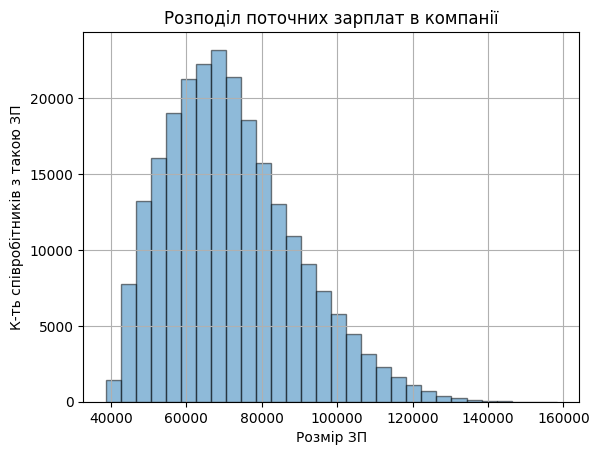

In [128]:
plt.hist(employees['salary'], bins = 30, alpha = .5, edgecolor='black')
plt.grid(axis = 'both', )
plt.xlabel('Розмір ЗП')
plt.ylabel('К-ть співробітників з такою ЗП')
plt.title('Розподіл поточних зарплат в компанії')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [ ]:
con.close()